### Multivariate Linear Regression. Standardization and analysis of the residuals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Example: bivariate dataset

- ice_cream sales as a function of temperature and humidity

In [3]:
# coeficients
b0 = 44 #np.random.randint(40, 50)
b1 = 1.037191424 # np.abs(np.random.normal(0.5, 1.2))
b2 = 1.271543234 # np.abs(np.random.normal(1, 1.2))
# variables
def value():
    t = np.random.normal(27, 4)
    h = np.random.normal(50, 5)
    e = np.random.normal(0, 1) *5    
    v = b0 + b1 *t + b2 *h + e 
    return (t, h, v)
b0, b1, b2

(44, 1.037191424, 1.271543234)

In [4]:
ice_cream = pd.DataFrame([value() for i in range(400)], columns = ['temperature', 'humidity', 'sales'])

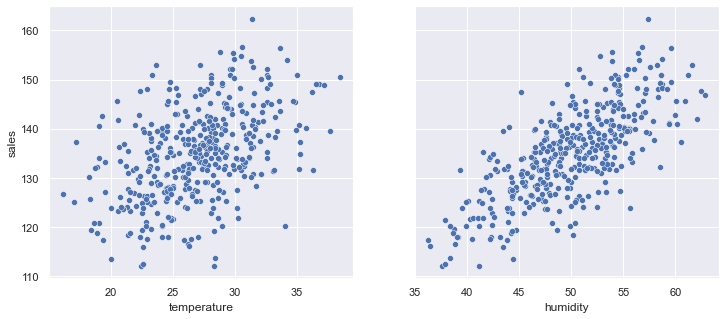

In [5]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.scatterplot(ax = axs[0], data = ice_cream, x = 'temperature', y = 'sales')
sns.scatterplot(ax = axs[1], data = ice_cream, x = 'humidity', y = 'sales');

#### train/test split

In [6]:
Xtrain, Xtest = train_test_split(ice_cream, test_size = 0.2, random_state = 2898)
Xtrain.shape, Xtest.shape

((320, 3), (80, 3))

#### fit model

In [7]:
X = Xtrain[['temperature', 'humidity']].to_numpy().reshape(-1, 2)
Y = Xtrain.sales.values.reshape(-1, 1)
lr = LinearRegression().fit(X, Y)

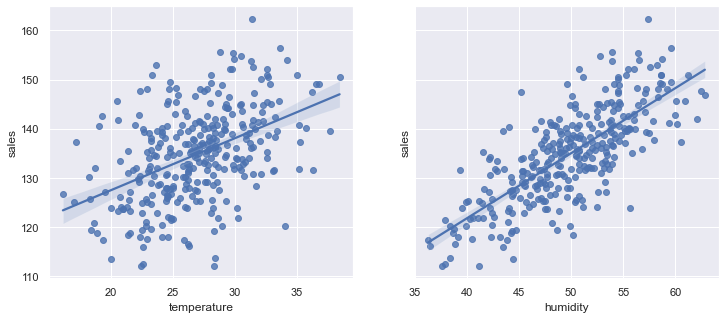

In [8]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.regplot(ax = axs[0], data = Xtrain, x = 'temperature', y = 'sales')
sns.regplot(ax = axs[1], data = Xtrain, x = 'humidity', y = 'sales');

In [9]:
print('Intercept \u03B20: %.5f' % lr.intercept_[0])
print('Coeficients \u03B21: %.5f' % lr.coef_[0][0])
print('Coeficients \u03B22: %.5f' % lr.coef_[0][1])

Intercept β0: 44.95792
Coeficients β1: 0.96363
Coeficients β2: 1.28310


#### predict

In [10]:
Xtest['predict'] = lr.predict(Xtest[['temperature', 'humidity']].to_numpy().reshape(-1, 2))

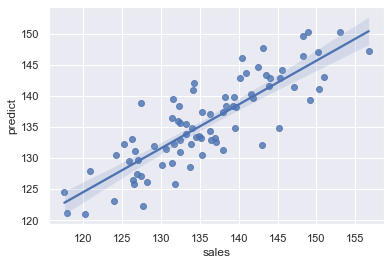

In [11]:
sns.regplot(data = Xtest, x = 'sales', y = 'predict');

#### model evaluation

In [12]:
mse = mean_squared_error(Xtest.sales, Xtest.predict, squared = True)
print("MSE: %.4f" % mse)
rmse = mean_squared_error(Xtest.sales, Xtest.predict, squared = False)
print("RMSE: %.4f" % rmse)
rsq = r2_score(Xtest.sales, Xtest.predict)
print('R-quadrat: %.5f' % rsq)

MSE: 20.8229
RMSE: 4.5632
R-quadrat: 0.70558


### analysis of the residuals (check normality)

- how does it look the histogram of a normal sample ?

In [13]:
gaussian_sample = np.random.normal(0, 1, 1000)

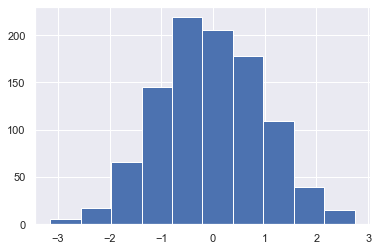

In [14]:
plt.hist(gaussian_sample);

- how does it look the histogram of our residuals ?

In [15]:
residuals = np.array([(y -p) for y, p in zip(Xtrain.sales, lr.predict(X))])

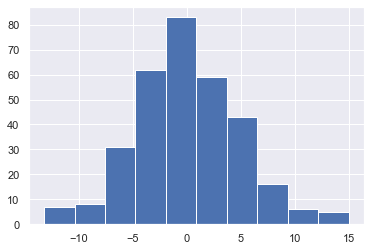

In [16]:
plt.hist(residuals);

### Q-Q plot

- we can use the Q-Q plot to check the normality of the residuals
- the Q-Q plot depicts the quantiles of our sample with respect to a reference distribution, in this case, a ***normal*** distribution

In [17]:
import scipy.stats as stats

- what are the quantiles of a normal distribution ?

In [18]:
np.quantile(gaussian_sample, np.linspace(0, 1, 11))

array([-3.14506011, -1.33250166, -0.89564186, -0.62571946, -0.32448416,
       -0.08376733,  0.2182991 ,  0.51048381,  0.81756883,  1.21492682,
        2.73781685])

- what are the quantiles of our residuals ?

In [19]:
np.quantile(residuals, np.linspace(0, 1, 11))

array([-13.21858487,  -6.25759185,  -3.77652776,  -2.35654353,
        -1.333991  ,  -0.35535917,   0.88407227,   2.18154097,
         4.21824791,   6.1970825 ,  14.9514122 ])

- they do not look very much similar, but this is because the variances (and the ranges) are different:

In [20]:
np.var(gaussian_sample), np.var(residuals)

(0.9972260698751179, 23.48703069479587)

### standardization

- for the comparison we need to ***standardize*** the sample
- standardization of a sample consists in substracting the *mean* and dividing by the *standard deviation*, i.e.:

$z_i = \frac{x_i - \bar{x}}{\sigma}$
- where:
    - $\bar{x}$ is the mean of the sample
    - $\sigma$ is the standard-deviation of the sample

In [21]:
standardized_residuals = (residuals - np.mean(residuals)) /np.std(residuals)

- now the quantiles look more similar to a normal distribution

In [22]:
np.quantile(standardized_residuals, np.linspace(0, 1, 11))

array([-2.7275386 , -1.29119898, -0.77925325, -0.48625201, -0.2752573 ,
       -0.07332524,  0.18242053,  0.45014177,  0.87039832,  1.27871341,
        3.08509227])

- we can check this by means of the qq-plot

Text(0.5, 1.0, 'QQ-plot of the residuals')

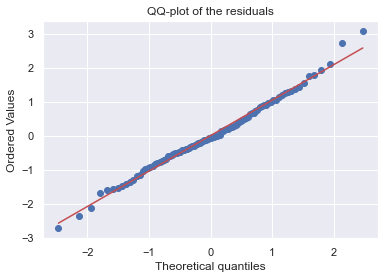

In [24]:
stats.probplot(np.quantile(standardized_residuals, np.linspace(0, 1, 101)), dist = 'norm', plot = plt.subplot());
plt.title('QQ-plot of the residuals')